In [1]:
#Boosting Technique : -
#1. ADA Boost : Adaptor Boosting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset bank.csv
df=pd.read_csv("heart.csv")
#to display first 5 records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#How many samples
df.shape

(303, 14)

In [5]:
#to check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#to check datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#to check duplicate rows
df.duplicated().sum()

1

In [10]:
#To remove duplicates rows
df.drop_duplicates(inplace=True)

In [11]:
#to check duplicate rows
df.duplicated().sum()

0

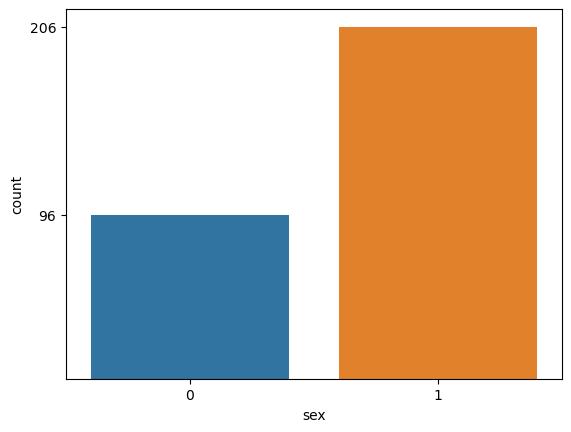

In [12]:
#How many samples in males and females 
#male means 1 and female means 0
#sex : discrete means categorical datatype , use countplot()
sns.countplot(data=df,x='sex')
y=df['sex'].value_counts()
plt.yticks(y)
plt.show()

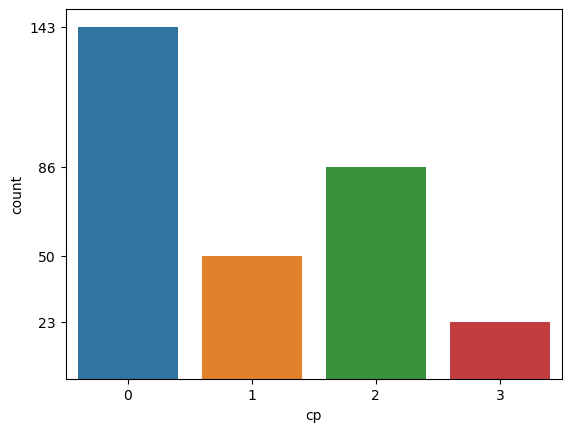

In [13]:
sns.countplot(data=df,x='cp')
y=df['cp'].value_counts()
plt.yticks(y)
plt.show()

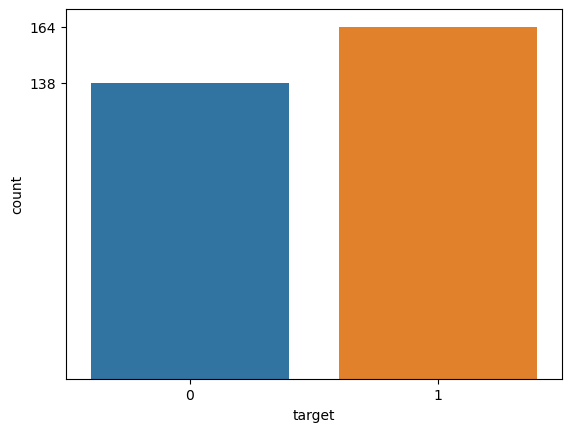

target
1    164
0    138
Name: count, dtype: int64


In [14]:
#here output variable : target : 
#how many samples for heart related patient ans how many samples for 
#no heart related patients 
sns.countplot(data=df,x='target')
y=df['target'].value_counts()
plt.yticks(y)
plt.show()
print(y)

In [15]:
#Select input and output
X=df.drop("target",axis=1) #select input
Y=df["target"] #output select

In [16]:
from sklearn.model_selection import train_test_split
#train_test_split()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                               random_state=1)

In [17]:
X_train.shape,X_test.shape

((211, 13), (91, 13))

In [18]:
#Apply StandardScaler on X_train,X_test
#Sccaling 
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
#create user defined function
def create_model(model):
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
#Perform base model means logisticregression

In [22]:
#perform DecisionTreeClassifier with gini index

In [23]:
#Apply pruning tech. (max_depth and min_samples_leaf)

In [24]:
#perform DecisionTreeClassifier with entropy

In [25]:
#Apply pruning tech. (max_depth and min_samples_leaf)

In [26]:
#Apply RandonForestclassifier

In [27]:
#Apply Ensembling Technique Boosting 
#1. first apply ADA Boost : call inbuilt class AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [28]:
#create the object of AdaBoostClassifier class
#ADA Boost creates decision stump (means one root node and 2 leaf node)
#leaf node : no any childs
ada=AdaBoostClassifier(n_estimators=6,random_state=1)
#n_estimators means how many decision stump , decision stump depend on 
#no. of input
#in case of our dataset , no. of features means inputs =13 
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.80      0.81      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[27 11]
 [10 43]]


In [29]:
#check impotant features
dict={'Input':X.columns,'IG':ada.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
1,sex,0.166667
2,cp,0.166667
7,thalach,0.166667
9,oldpeak,0.166667
10,slope,0.166667
11,ca,0.166667
0,age,0.000000
3,trestbps,0.000000
4,chol,0.000000
5,fbs,0.000000


In [30]:
X.shape

(302, 13)

In [31]:
'''for i in range(1,14):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No. of Decision Stump : ",i)
    #call function
    ada=create_model(ada)'''

'for i in range(1,14):\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("No. of Decision Stump : ",i)\n    #call function\n    ada=create_model(ada)'

In [32]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling 
#technique 
# GB  : - its create a fully grown tree.this algorithm is focus on 
#short comings 
#short comings means error 

In [33]:
#call inbuilt class for Gradient Boosting : GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
#Create the object of GradientBoostingClassifier class  and passing the 
#parameter n_estimators means how many iteration means how many
#decisionTree use for train the model
gbc=GradientBoostingClassifier(n_estimators=11,random_state=1)
#n_estimators>=10 and <=100
#call function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]


In [35]:
'''for i in range(10,101):
    #create the object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No. of estimators : ",i)
    #call function 
    gbc=create_model(gbc)'''

'for i in range(10,101):\n    #create the object of GradientBoostingClassifier class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print("No. of estimators : ",i)\n    #call function \n    gbc=create_model(gbc)'

In [36]:
#check impotant features
dict={'Input':X.columns,'IG':gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
2,cp,0.428971
11,ca,0.151844
7,thalach,0.085778
8,exang,0.077987
12,thal,0.065412
9,oldpeak,0.064054
1,sex,0.042441
0,age,0.030353
3,trestbps,0.020001
10,slope,0.019248


In [37]:
#3.Extreme Gradient Boosting (XGB) : 
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [38]:
#call inbuilt class : XGBClassifier
#first time install xgboost on system
#!pip install xgboost

In [39]:
from xgboost import XGBClassifier
#here XGBClassifier is a inbuilt class which define in package xgboost

In [40]:
#create object of XGBClassifier class
xgc=XGBClassifier(n_estimators=10 ,reg_alpha=1,random_state=1)
#reg means regularisation and alpha means lambda means hyperparameter
#if reg_alpha=1 , 1 means True means automatic handle outlier and 
#overfitting
#call function 
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[28 10]
 [12 41]]


In [41]:
#check impotant features (Gradient Boost)
dict={'Input':X.columns,'IG':gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
2,cp,0.428971
11,ca,0.151844
7,thalach,0.085778
8,exang,0.077987
12,thal,0.065412
9,oldpeak,0.064054
1,sex,0.042441
0,age,0.030353
3,trestbps,0.020001
10,slope,0.019248


In [42]:
#check impotant features XGB
dict={'Input':X.columns,'IG':xgc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
2,cp,0.404918
8,exang,0.122104
11,ca,0.103237
10,slope,0.072942
12,thal,0.069682
9,oldpeak,0.065776
7,thalach,0.055674
3,trestbps,0.025409
0,age,0.024004
1,sex,0.023496


In [43]:
'''for i in range(10,101):
    #create object of XGBClassifier class
    xgc=XGBClassifier(n_estimators=i ,reg_alpha=1,random_state=1)
    print("No. of estimators : ",i)
    #call function 
    xgc=create_model(xgc)'''

'for i in range(10,101):\n    #create object of XGBClassifier class\n    xgc=XGBClassifier(n_estimators=i ,reg_alpha=1,random_state=1)\n    print("No. of estimators : ",i)\n    #call function \n    xgc=create_model(xgc)'